<a href="https://colab.research.google.com/github/Prithivi1515/Demo/blob/main/Evaluation_Metrics_and_Regression_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Evaluation Metrics and
Regression Implementation

Theoretical


1. What does R-squared represent in a regression model:

R-squared in a regression model: R-squared represents the proportion of the variance in the dependent variable that is explained by the independent variables. It measures how well the regression model fits the data.

2. What are the assumptions of linear regression:

Linearity: The relationship between independent and dependent variables is linear.

Independence: Observations are independent of each other.

Homoscedasticity: The variance of residuals (errors) is constant across all levels of the independent variable(s).

Normality of residuals: Residuals are normally distributed.

No multicollinearity: Independent variables are not highly correlated.

3. What is the difference between R-squared and Adjusted R-squared:

R-squared measures the proportion of variance explained by the independent variables.

Adjusted R-squared adjusts the R-squared value for the number of predictors in the model, penalizing for adding irrelevant predictors.

4. Why do we use Mean Squared Error (MSE):

MSE is used to measure the average squared difference between the predicted and actual values. It penalizes larger errors more heavily, making it useful for models where large errors are undesirable.

5. What does an Adjusted R-squared value of 0.85 indicate:

It indicates that 85% of the variance in the dependent variable is explained by the independent variables, after adjusting for the number of predictors in the model.

6. How do we check for normality of residuals in linear regression:

Use graphical methods like Q-Q plots.

Conduct statistical tests such as the Shapiro-Wilk test or the Kolmogorov-Smirnov test.

7. What is multicollinearity, and how does it impact regression:

Multicollinearity occurs when independent variables are highly correlated. It can make it difficult to determine the individual effect of each variable, leading to unstable coefficient estimates and reduced interpretability.

8. What is Mean Absolute Error (MAE):

MAE is the average of the absolute differences between predicted and actual values. It provides a simple and interpretable measure of model accuracy, with no emphasis on large errors.

9. What are the benefits of using an ML pipeline:

Automates repetitive tasks.

Ensures consistency in model training and evaluation.

Simplifies model deployment and scalability.


10. Why is RMSE considered more interpretable than MSE:

RMSE is on the same scale as the original data, making it easier to interpret in the context of the problem, unlike MSE, which is in squared units.

11. What is pickling in Python, and how is it useful in ML:

Pickling is the process of serializing Python objects into a byte stream. It allows saving and loading models in machine learning, enabling reuse and deployment.

12.  What does a high R-squared value mean:

A high R-squared value (close to 1) suggests that the model explains most of the variance in the dependent variable. However, it doesn’t necessarily imply a good model, as overfitting can result in high R-squared values.

13. What happens if linear regression assumptions are violated:

Violating assumptions can lead to biased estimates, incorrect significance tests, and poor model performance. For instance, violating homoscedasticity can lead to inefficient estimates, and multicollinearity can make coefficients unstable.

14.  How can we address multicollinearity in regression:

Remove or combine correlated variables.

Use regularization techniques like Ridge or Lasso regression.

15. How can feature selection improve model performance in regression analysis:

Feature selection can improve model performance by eliminating irrelevant or redundant features, which helps reduce overfitting and increases interpretability.

16. How is Adjusted R-squared calculated?

Adjusted R-squared=1−(
(1−R
2
 )(n−1)
​/n−p−1
 )
Where:

n = number of observation

p = number of predictors

17. Why is MSE sensitive to outliers:

MSE squares the residuals, which gives higher weight to larger errors. Outliers with large errors can significantly increase MSE.

18. What is the role of homoscedasticity in linear regression:

Homoscedasticity ensures that the variance of residuals is constant across all levels of the independent variables. If the variance is not constant (heteroscedasticity), it can lead to inefficient estimates and affect statistical tests.

19. What is Root Mean Squared Error (RMSE):

RMSE is the square root of the MSE. It provides an interpretable measure of how much error is present in the model's predictions in the same units as the target variable.

20.  Why is pickling considered risky:

Pickling can be risky because:

It may not be compatible across different versions of Python or libraries.

It can execute malicious code if untrusted data is unpickled.

21. What alternatives exist to pickling for saving ML models:

Joblib: A more efficient alternative for saving large machine learning models.

JSON or CSV: For saving simple model parameters or results.

ONNX: A format for exchanging machine learning models across different frameworks.

22. What is heteroscedasticity, and why is it a problem:

Heteroscedasticity refers to non-constant variance of residuals. It can lead to inefficient estimates, biased standard errors, and invalid inferences in regression.

23.  How can interaction terms enhance a regression model's predictive power?

Interaction terms represent the combined effect of two or more independent variables on the dependent variable. Including interaction terms can improve model accuracy by capturing relationships that aren't purely additive.

Practical

1. Write a Python script to visualize the distribution of errors (residuals) for a multiple linear regression model
using Seaborn's "diamonds" dataset.

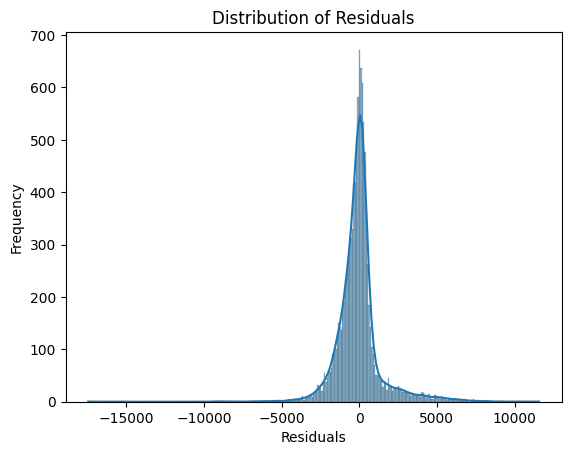

In [5]:
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the dataset
diamonds = sns.load_dataset('diamonds')

# Prepare the data
X = diamonds[['carat', 'depth', 'table', 'x', 'y', 'z']]
y = diamonds['price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and calculate residuals
y_pred = model.predict(X_test)
residuals = y_test - y_pred

# Plot the residuals
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

2. Write a Python script to calculate and print Mean Squared Error (MSE), Mean Absolute Error (MAE), and Root
Mean Squared Error (RMSE) for a linear regression model.

In [6]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print the results
print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')

MSE: 2242178.9040856035
MAE: 888.4808633901026
RMSE: 1497.3906985438382


3. Write a Python script to check if the assumptions of linear regression are met. Use a scatter plot to check
linearity, residuals plot for homoscedasticity, and correlation matrix for multicollinearity.

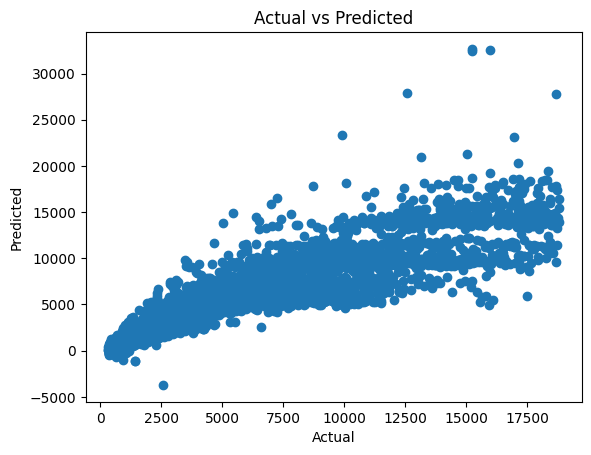

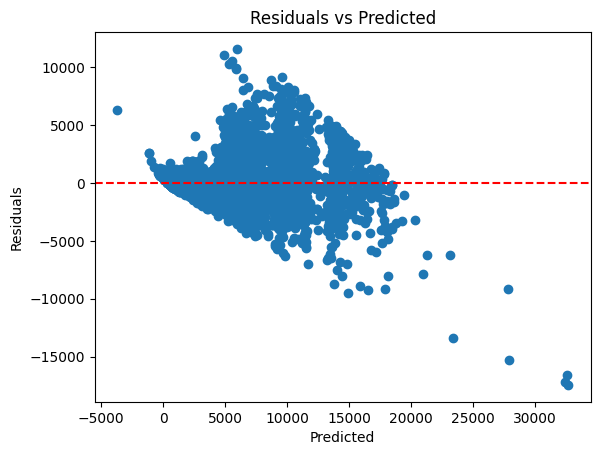

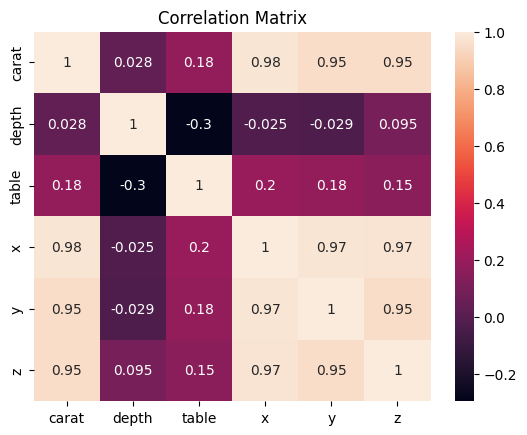

In [7]:
# Linearity: Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

# Homoscedasticity: Residuals plot
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Multicollinearity: Correlation matrix
corr_matrix = X.corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

4. Create a machine learning pipeline with feature scaling and evaluate the performance of different regression models.

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import cross_val_score

# Create pipelines
pipelines = {
    'linear_regression': Pipeline([('scaler', StandardScaler()), ('model', LinearRegression())]),
    'ridge_regression': Pipeline([('scaler', StandardScaler()), ('model', Ridge())])
}

# Evaluate models
for name, pipeline in pipelines.items():
    scores = cross_val_score(pipeline, X, y, cv=5, scoring='r2')
    print(f'{name} R2 score: {scores.mean()}')

linear_regression R2 score: -0.6685662712903937
ridge_regression R2 score: -0.6699094670782626


5. Implement a simple linear regression model and print the model’s coefficients, intercept, and R-squared score.

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Print coefficients and intercept
print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

Coefficients: [10683.18425966  -204.09955335  -104.26736872 -1286.79957429
    37.63252069    53.39486424]
Intercept: 20976.563736037213
R-squared: 0.8589542625888938


6. Analyze the relationship between total bill and tip in the ‘tips’ dataset using simple linear regression.

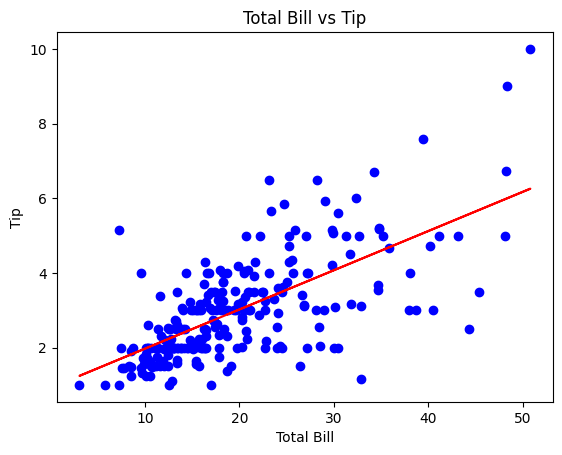

In [10]:
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the dataset
tips = sns.load_dataset('tips')

# Prepare the data
X = tips[['total_bill']]
y = tips['tip']

# Fit the model
model = LinearRegression()
model.fit(X, y)

# Predict
y_pred = model.predict(X)

# Plot the results
plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='red')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Total Bill vs Tip')
plt.show()

7. Fit a linear regression model to a synthetic dataset with one feature, predict new values, and plot the results.

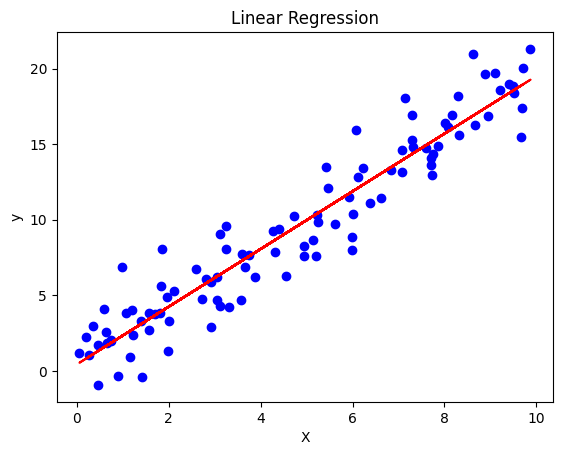

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 2 * X + np.random.randn(100, 1) * 2

# Fit the model
model = LinearRegression()
model.fit(X, y)

# Predict
y_pred = model.predict(X)

# Plot the results
plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.show()

8. Pickle a trained linear regression model and save it to a file.

In [12]:
import pickle

# Save the model
with open('linear_regression_model.pkl', 'wb') as file:
    pickle.dump(model, file)

9. Fit a polynomial regression model (degree 2) to a dataset and plot the regression curve.

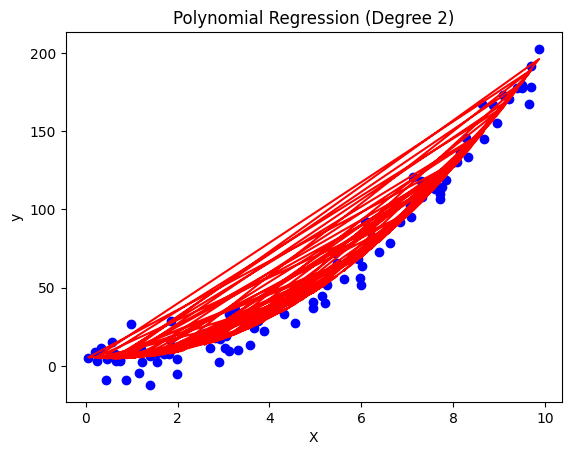

In [13]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 2 * X**2 + np.random.randn(100, 1) * 10

# Transform features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit the model
model = LinearRegression()
model.fit(X_poly, y)

# Predict
y_pred = model.predict(X_poly)

# Plot the results
plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression (Degree 2)')
plt.show()

10. Generate synthetic data for simple linear regression, fit a model, and print the coefficient and intercept.

In [14]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 2 * X + np.random.randn(100, 1) * 2

# Fit the model
model = LinearRegression()
model.fit(X, y)

# Print coefficients and intercept
print(f'Coefficient: {model.coef_}')
print(f'Intercept: {model.intercept_}')

Coefficient: [[1.90804535]]
Intercept: [0.43019232]


11. Fit polynomial regression models of different degrees and compare their performance.

In [15]:
from sklearn.metrics import mean_squared_error

degrees = [1, 2, 3, 4]
mse_scores = []

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)
    model = LinearRegression()
    model.fit(X_poly, y)
    y_pred = model.predict(X_poly)
    mse = mean_squared_error(y, y_pred)
    mse_scores.append(mse)
    print(f'Degree {degree} MSE: {mse}')

Degree 1 MSE: 3.226338255868214
Degree 2 MSE: 3.1087746654009476
Degree 3 MSE: 3.0898603155350886
Degree 4 MSE: 3.0541547128837614


12. Fit a simple linear regression model with two features and print the model’s coefficients, intercept, and R-squared score.

In [16]:
# Prepare the data
X = diamonds[['carat', 'depth']]
y = diamonds['price']

# Fit the model
model = LinearRegression()
model.fit(X, y)

# Print coefficients and intercept
print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')

# Calculate R-squared
r2 = r2_score(y, model.predict(X))
print(f'R-squared: {r2}')

Coefficients: [7765.14066377 -102.16532216]
Intercept: 4045.3331826016815
R-squared: 0.8506754571636563


13. Generate synthetic data, fit a linear regression model, and visualize the regression line.

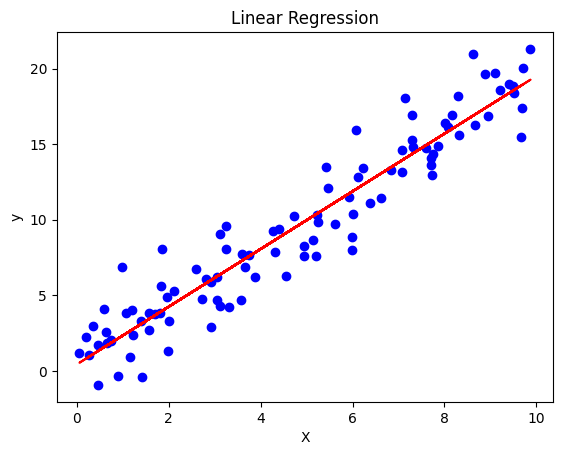

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 2 * X + np.random.randn(100, 1) * 2

# Fit the model
model = LinearRegression()
model.fit(X, y)

# Predict
y_pred = model.predict(X)

# Plot the results
plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.show()

14. Use the Variance Inflation Factor (VIF) to check for multicollinearity.


In [31]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.datasets import make_regression

# Generate synthetic data
X, y = make_regression(n_samples=100, n_features=5, noise=10, random_state=42)

# Convert X to pandas DataFrame for VIF calculation
X_df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(X.shape[1])])

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X_df.columns
vif_data["VIF"] = [variance_inflation_factor(X_df.values, i) for i in range(len(X_df.columns))]
print(vif_data)


     feature       VIF
0  feature_0  1.019320
1  feature_1  1.012651
2  feature_2  1.059337
3  feature_3  1.046592
4  feature_4  1.020596


15. Generate synthetic data for a polynomial relationship (degree 4), fit a polynomial regression model, and plot the regression curve.

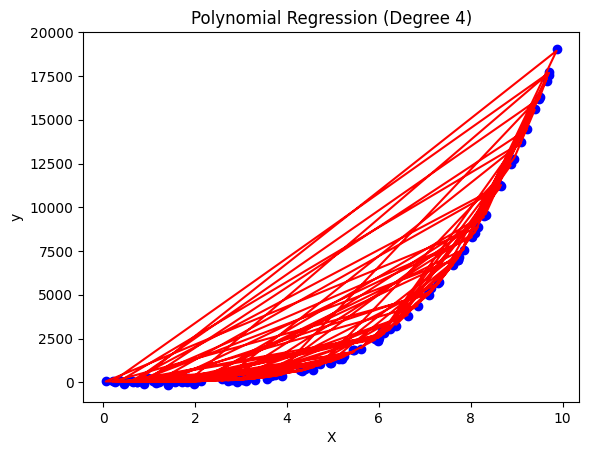

In [20]:
# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 2 * X**4 + np.random.randn(100, 1) * 100

# Transform features
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)

# Fit the model
model = LinearRegression()
model.fit(X_poly, y)

# Predict
y_pred = model.predict(X_poly)

# Plot the results
plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression (Degree 4)')
plt.show()

16. Create a machine learning pipeline with data standardization and a multiple linear regression model, and print the R-squared score.

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Create pipeline
pipeline = Pipeline([('scaler', StandardScaler()), ('model', LinearRegression())])

# Fit the model
pipeline.fit(X_train, y_train)

# Print R-squared score
r2 = pipeline.score(X_test, y_test)
print(f'R-squared: {r2}')

R-squared: 0.8589542625888938


17. Perform polynomial regression (degree 3) on a synthetic dataset and plot the regression curve.

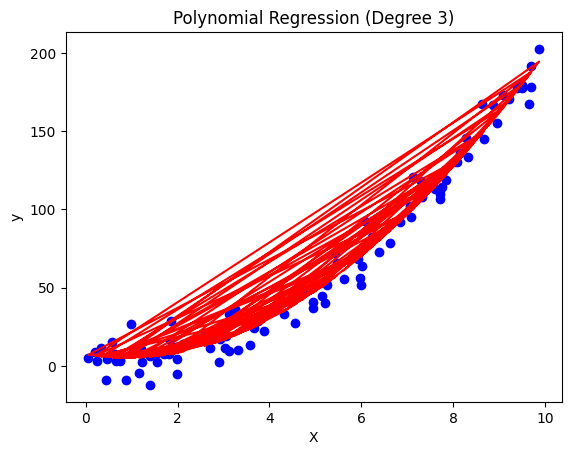

In [22]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 2 * X**2 + np.random.randn(100, 1) * 10

# Transform features
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

# Fit the model
model = LinearRegression()
model.fit(X_poly, y)

# Predict
y_pred = model.predict(X_poly)

# Plot the results
plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression (Degree 3)')
plt.show()

18. Perform multiple linear regression on a synthetic dataset with 5 features and print the R-squared score and model coefficients.

In [23]:
# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 5) * 10
y = 2 * X[:, 0] + 3 * X[:, 1] + np.random.randn(100) * 2

# Fit the model
model = LinearRegression()
model.fit(X, y)

# Print coefficients and R-squared
print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')
print(f'R-squared: {model.score(X, y)}')

Coefficients: [ 1.94741014  2.91508641  0.09261334  0.00765247 -0.06284471]
Intercept: 0.4744238749871066
R-squared: 0.9543090519747117


19. Generate synthetic data for linear regression, fit a model, and visualize the data points along with the regression line.

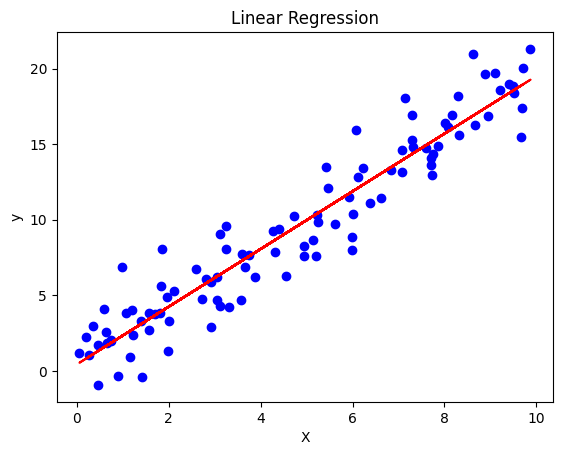

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 2 * X + np.random.randn(100, 1) * 2

# Fit the model
model = LinearRegression()
model.fit(X, y)

# Predict
y_pred = model.predict(X)

# Plot the results
plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.show()

20. Create a synthetic dataset with 3 features and perform multiple linear regression. Print the model's R-squared score and coefficients.

In [25]:
# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 3) * 10
y = 2 * X[:, 0] + 3 * X[:, 1] + 4 * X[:, 2] + np.random.randn(100) * 2

# Fit the model
model = LinearRegression()
model.fit(X, y)

# Print coefficients and R-squared
print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')
print(f'R-squared: {model.score(X, y)}')

Coefficients: [2.05560082 2.96844756 4.11408115]
Intercept: -0.5299708896845203
R-squared: 0.985339509614849


21. Serialize and deserialize machine learning models using joblib.

In [26]:
from joblib import dump, load

# Save the model
dump(model, 'model.joblib')

# Load the model
loaded_model = load('model.joblib')

22. Perform linear regression with categorical features using one-hot encoding.

In [27]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

# Load the dataset
tips = sns.load_dataset('tips')

# One-hot encode categorical features
tips_encoded = pd.get_dummies(tips, columns=['sex', 'smoker', 'day', 'time'], drop_first=True)

# Prepare the data
X = tips_encoded.drop('tip', axis=1)
y = tips_encoded['tip']

# Fit the model
model = LinearRegression()
model.fit(X, y)

# Print coefficients
print(f'Coefficients: {model.coef_}')

Coefficients: [ 0.09448701  0.175992    0.03244094  0.08640832  0.1622592   0.04080082
  0.13677854 -0.0681286 ]


23. Compare Ridge Regression with Linear Regression on a synthetic dataset.

In [28]:
from sklearn.linear_model import Ridge

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 5) * 10
y = 2 * X[:, 0] + 3 * X[:, 1] + np.random.randn(100) * 2

# Fit Linear Regression
linear_model = LinearRegression()
linear_model.fit(X, y)

# Fit Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X, y)

# Print coefficients and R-squared
print('Linear Regression Coefficients:', linear_model.coef_)
print('Ridge Regression Coefficients:', ridge_model.coef_)
print('Linear Regression R-squared:', linear_model.score(X, y))
print('Ridge Regression R-squared:', ridge_model.score(X, y))

Linear Regression Coefficients: [ 1.94741014  2.91508641  0.09261334  0.00765247 -0.06284471]
Ridge Regression Coefficients: [ 1.94449454  2.91133003  0.09236108  0.00785471 -0.0634473 ]
Linear Regression R-squared: 0.9543090519747117
Ridge Regression R-squared: 0.9543073658279788


24. Use cross-validation to evaluate a Linear Regression model on a synthetic dataset.

In [29]:
from sklearn.model_selection import cross_val_score

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 5) * 10
y = 2 * X[:, 0] + 3 * X[:, 1] + np.random.randn(100) * 2

# Perform cross-validation
scores = cross_val_score(LinearRegression(), X, y, cv=5, scoring='r2')
print(f'Cross-validated R-squared scores: {scores}')
print(f'Mean R-squared: {scores.mean()}')

Cross-validated R-squared scores: [0.94112519 0.94249762 0.96347783 0.97118476 0.90579806]
Mean R-squared: 0.9448166928729747


25. Compare polynomial regression models of different degrees and print the R-squared score for each.

In [30]:
from sklearn.metrics import mean_squared_error

degrees = [1, 2, 3, 4]
mse_scores = []

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)
    model = LinearRegression()
    model.fit(X_poly, y)
    y_pred = model.predict(X_poly)
    mse = mean_squared_error(y, y_pred)
    mse_scores.append(mse)
    print(f'Degree {degree} MSE: {mse}')

Degree 1 MSE: 4.4952389358391365
Degree 2 MSE: 3.323606066626903
Degree 3 MSE: 2.2974313218172453
Degree 4 MSE: 1.906132764079443e-24
